<a href="https://colab.research.google.com/github/bethdfuller/MSDA/blob/main/D207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# D207

### Beth Fuller

### April 2024

# A1: Question

Is there a significant cost (Monthly Charge) difference between customers that churned and those that the telecommunications company retained?

# A2: Stakeholder Benefits

This analysis will help stakeholders determine if customer churn is due to random chance or a significant cost difference. If there is a significant cost difference stakeholders can further investigate causes, solutions, and retention strategies.

# A3: Data

The data set to be used will be churn_clean.csv. From this csv file the following variables will be used:

*   Churn
*   MonthlyCharge

# B: Data Analysis

In [ ]:
# Import libraries
import pandas as pd
import plotnine as p9
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Display maximum columns and rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 60)

# URL to churn data set
url = 'https://raw.githubusercontent.com/bethdfuller/MSDA/main/D207/churn_clean.csv'

# Read churn data set
churndf = pd.read_csv(url, index_col='CaseOrder')

In [ ]:
# Churn data frame information
churndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_id           10000 non-null  object 
 1   Interaction           10000 non-null  object 
 2   UID                   10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  TimeZone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  int64  
 14  Age                   10000 non-null  int64  
 15  Income                10

In [ ]:
# Head of churn data frame
churndf.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,Churn,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,Contract,Port_modem,Tablet,InternetService,Phone,Multiple,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,Urban,America/Sitka,Environmental health practitioner,0,68,28561.99,Widowed,Male,No,7.978323,10,0,1,No,One year,Yes,Yes,Fiber Optic,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110,5,5,5,3,4,4,3,4
2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,Urban,America/Detroit,"Programmer, multimedia",1,27,21704.77,Married,Female,Yes,11.699080,12,0,1,Yes,Month-to-month,No,Yes,Fiber Optic,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766,3,4,3,3,4,3,4,4
3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,Urban,America/Los_Angeles,Chief Financial Officer,4,50,9609.57,Widowed,Female,No,10.752800,9,0,1,Yes,Two Year,Yes,No,DSL,Yes,Yes,No,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961,4,4,2,4,4,3,3,3
4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,Suburban,America/Los_Angeles,Solicitor,1,48,18925.23,Married,Male,No,14.913540,15,2,0,Yes,Two Year,No,No,DSL,Yes,No,Yes,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412,4,4,4,2,5,4,3,3
5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,Suburban,America/Chicago,Medical illustrator,0,83,40074.19,Separated,Male,Yes,8.147417,16,2,1,No,Month-to-month,Yes,No,Fiber Optic,No,No,No,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436,4,4,4,3,4,4,4,5


In [ ]:
#Create new data frame with just variables Churn & MonthlyCharge
mc_churn_df = churndf[["Churn", "MonthlyCharge"]]
mc_churn_df.head()

,Churn,MonthlyCharge
CaseOrder,,
1,No,172.455519
2,Yes,242.632554
3,No,159.947583
4,No,119.956840
5,Yes,149.948316


In [ ]:
# Churn count
churn_count = mc_churn_df['Churn'].value_counts()

print("Churn Count: ")
print(churn_count)

Churn Count: 
Churn
No     7350
Yes    2650
Name: count, dtype: int64


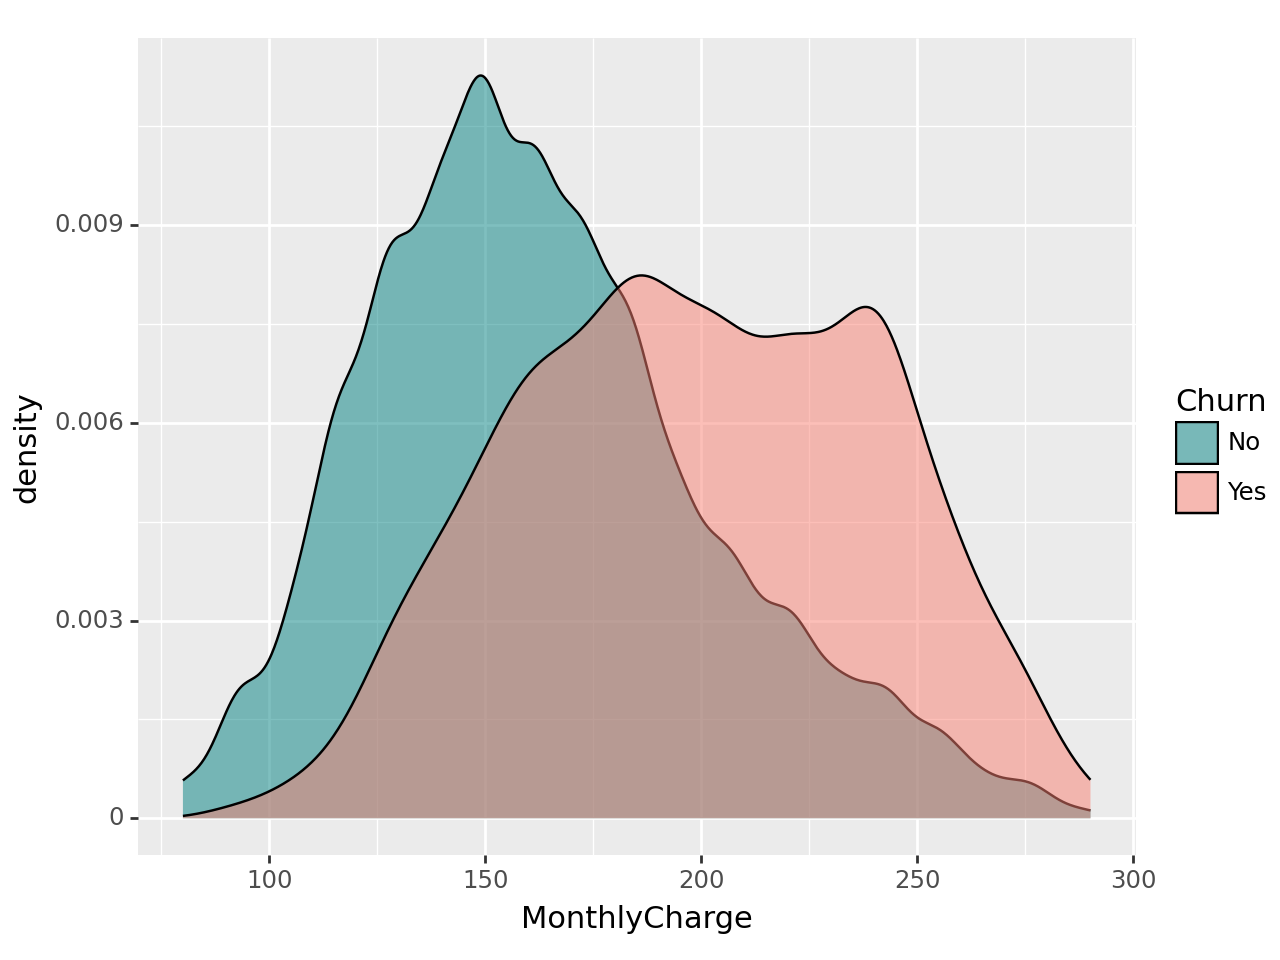

In [ ]:
# Density plot with Monthly Charge
print(p9.ggplot(mc_churn_df) + p9.aes(x='MonthlyCharge', fill='Churn') +p9.geom_density(alpha=0.5) + p9.scale_fill_manual(values=["teal", "salmon"]))

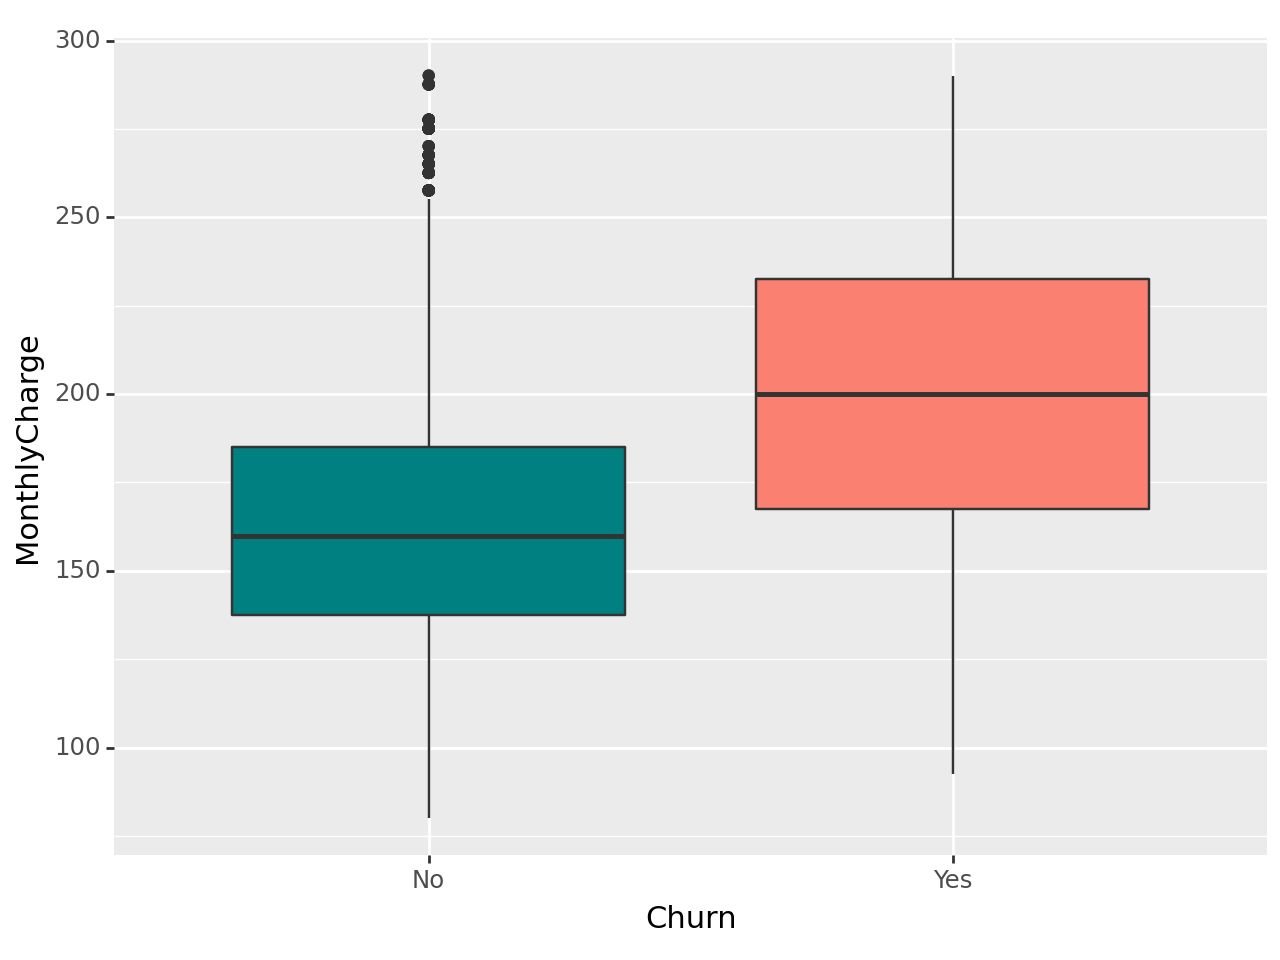

<Figure Size: (640 x 480)>

In [ ]:
# Boxplot
(p9.ggplot(mc_churn_df)+ p9.aes(x='Churn',y='MonthlyCharge', fill='Churn')+ p9.geom_boxplot(fill=["teal", "salmon"]))

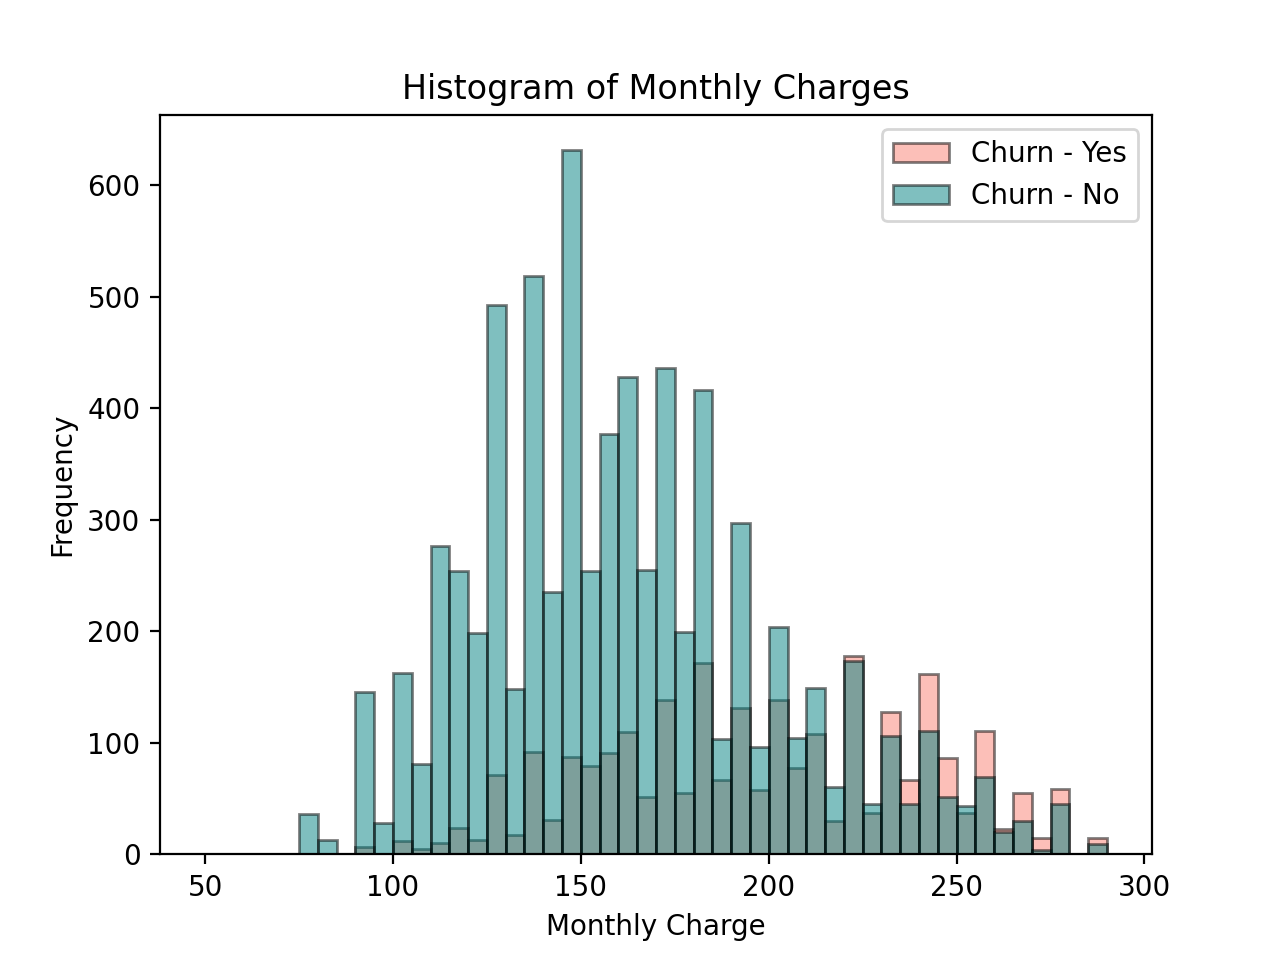

In [ ]:
#Histogram Monthly Charge / Churn

# Filter the data frame for churn
churn_customers_df = mc_churn_df[mc_churn_df['Churn'] == 'Yes']
retained_customers_df = mc_churn_df[mc_churn_df['Churn'] == 'No']

# Define the bin edges for the histogram with $5 buckets
bin_edges = range(50, int(mc_churn_df['MonthlyCharge'].max()) + 5, 5)

# Create the histogram for churned customers
plt.hist(churn_customers_df['MonthlyCharge'], bins=bin_edges, edgecolor='black', color='salmon', alpha=0.5, label='Churn - Yes')

# Create the histogram for non-churned customers
plt.hist(retained_customers_df['MonthlyCharge'], bins=bin_edges, edgecolor='black', color='teal', alpha=0.5, label='Churn - No')

# Add labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')

# Add legend
plt.legend()

# Show the plot
plt.show()


# B1: Python T-test

In [ ]:
# T-test

# Create data frames for two samples - Churn Yes / Churn No & Monthly Charge
charge_churnyesdf = mc_churn_df[mc_churn_df['Churn'] == 'Yes']['MonthlyCharge']
charge_churnnodf = mc_churn_df[mc_churn_df['Churn'] == 'No']['MonthlyCharge']

# Run t-test
t_result = stats.ttest_ind(charge_churnyesdf, charge_churnnodf)

# Standard value of alpha
alpha = 0.05

# Print results
print("Result: ", t_result)

# Print if there is a difference
if (t_result[1] < alpha):
  print("Statistically significant difference!")
else: print("No statistically significant difference!")

Result:  TtestResult(statistic=40.18947672237426, pvalue=0.0, df=9998.0)
Statistically significant difference!


# B3: Justification

For this exploratory data analysis, the alternative hypothesis is that the customers who churned had a significantly higher cost than those who did not churn. Since this hypothesis involves one continuous variable (Monthly Charge) and two groups Churn Yes and Churn No. A t-test was chosen since the t-test is used to compare the means of two groups to determine if there is a significant difference between them. A chi-square test was ruled out because a chi-square test uses two categorical variables and in this case, Monthly Charge is a continuous variable. The ANOVA or analysis of variance was ruled out because this test is used to compare continuous variables and multiple groups and while we have a continuous variable (Monthly Charge) we only have two groups to compare (Churn Yes/No).


# C1: Univariate Statistical Distribution

The univariate statistical distribution for the continuous variables was shown visually with a table, box plot, and histogram the categorical variables were shown with a pie chart.

Continuous Variables:
* Monthly Charge
* Tenure

Categorical Variables:
* Churn
* Techie

Findings:

Monthly Charge:
* Summary: this shows that the majority of monthly charges fall between approximately $140 - $200
* Box plot: shows the summary result visually, the box representing the interquartile range, the middle line representing the median of the data ($167), the whiskers extending to the upper/lower quartiles, there are no individual points beyond the whiskers indicating no outliers
* Histogram: shows a unimodal, bell-shaped, sightly right-skewing histogram

Tenure:
* Summary: the median tenure is 35 months, and the IQR is a wide range from 8 months to 61 months i
* Boxplot: the box plot shows the summary result visually a large IQR with a median at 35 months
* Histogram: bimodal, non-symmetric histogram

Churn:
* Pie: shows churn distribution Yes - 26.5%, No - 73.5%

Techie:
* Techie: shows techie distribution Yes 16.8%, No - 83.2%

In [ ]:
# Summary Monthly Charge
churndf['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

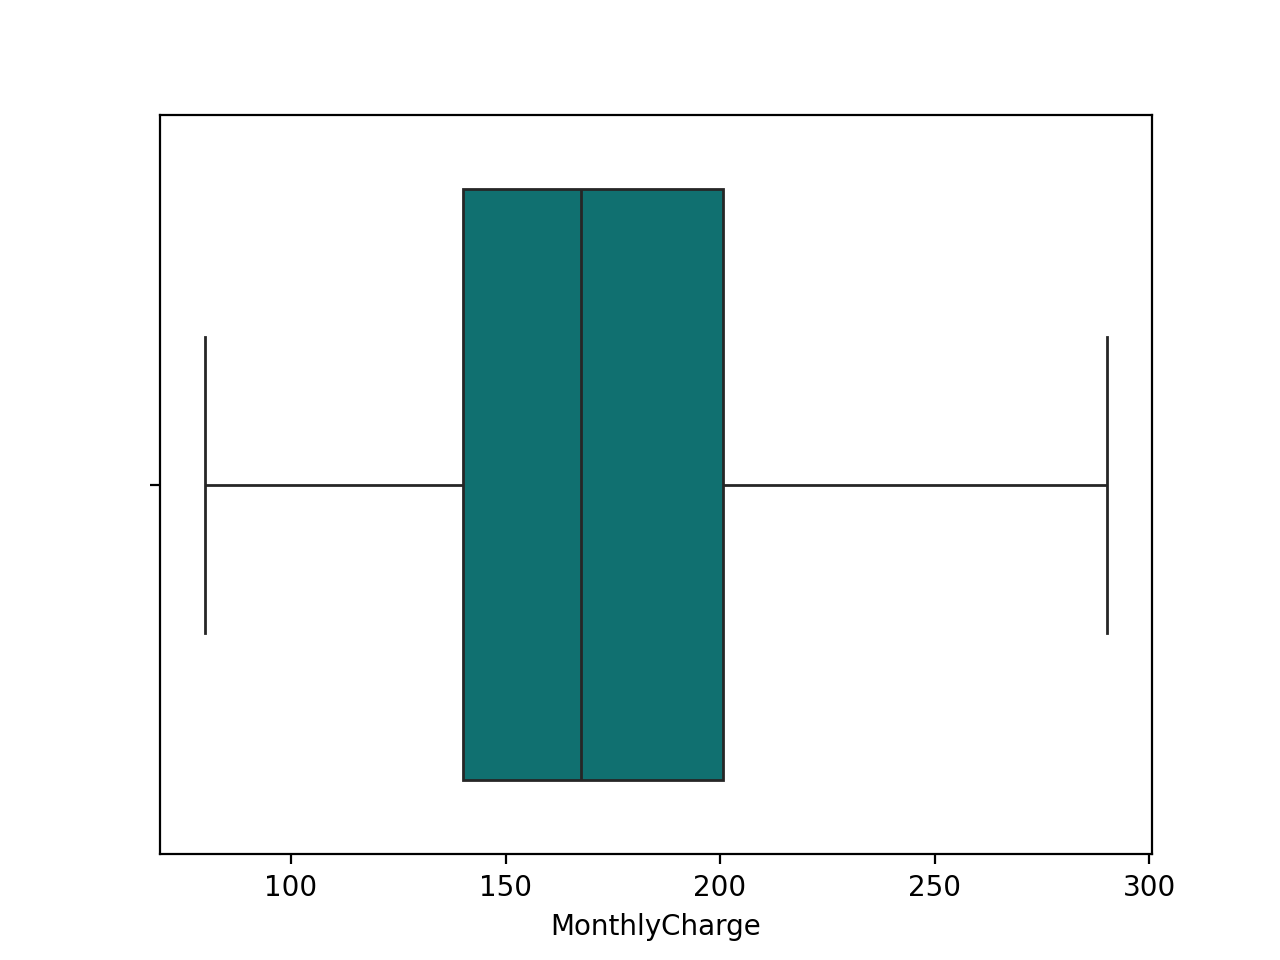

In [ ]:
# Boxplot Monthly Charge
boxplot = sns.boxplot(x='MonthlyCharge', data=churndf, color='teal')

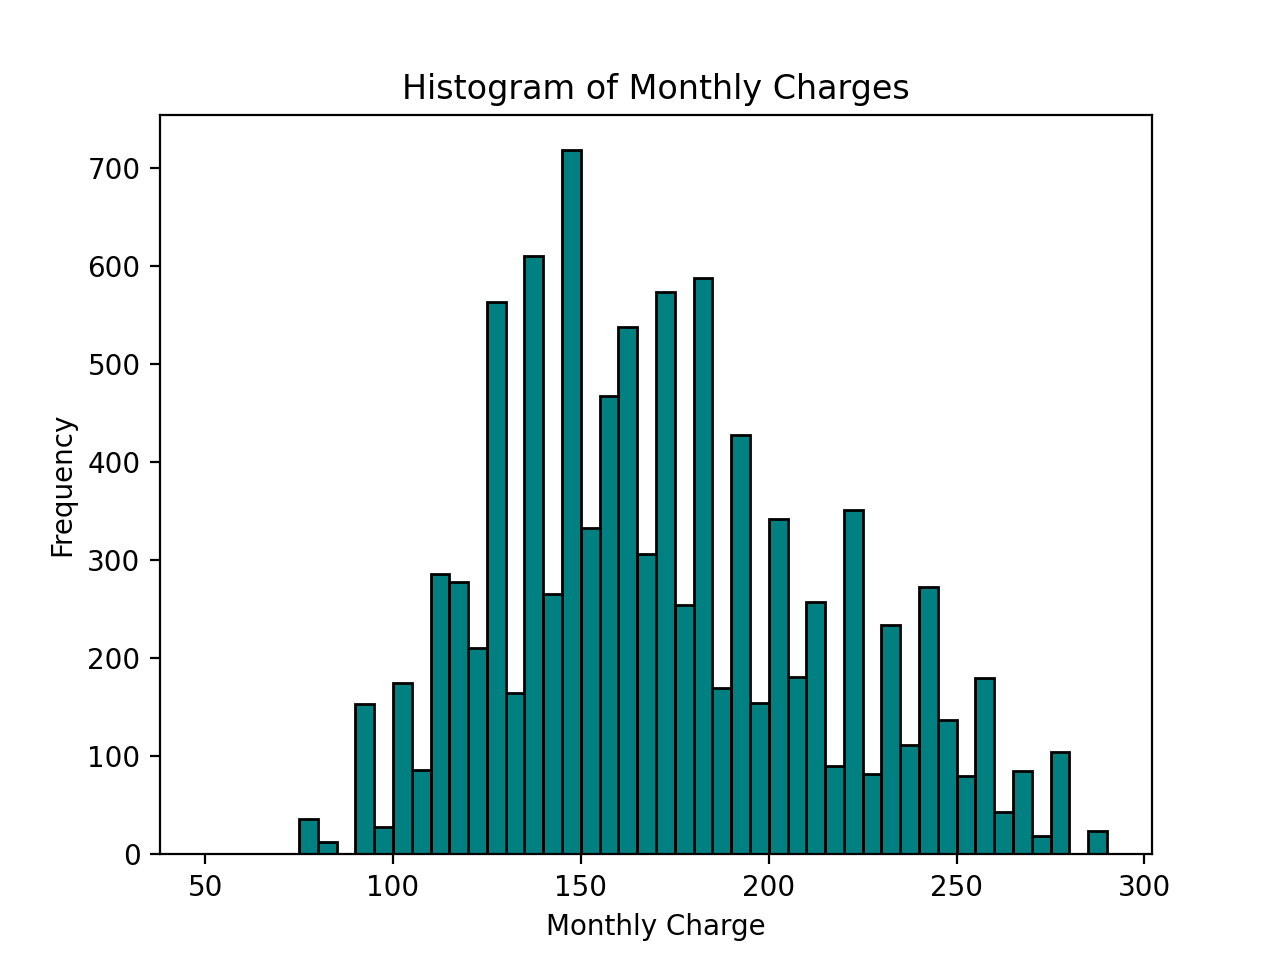

In [ ]:
# Monthly Charge Histogram

# Define the bin edges for the histogram with $5 buckets
bin_edges = range(50, int(mc_churn_df['MonthlyCharge'].max()) + 5, 5)

# Create the histogram for Monthly Charge
plt.hist(churndf['MonthlyCharge'], bins=bin_edges, edgecolor='black', color='teal')

# Add labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')

# Show the plot
plt.show()


In [ ]:
# Summary Tenure
churndf['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

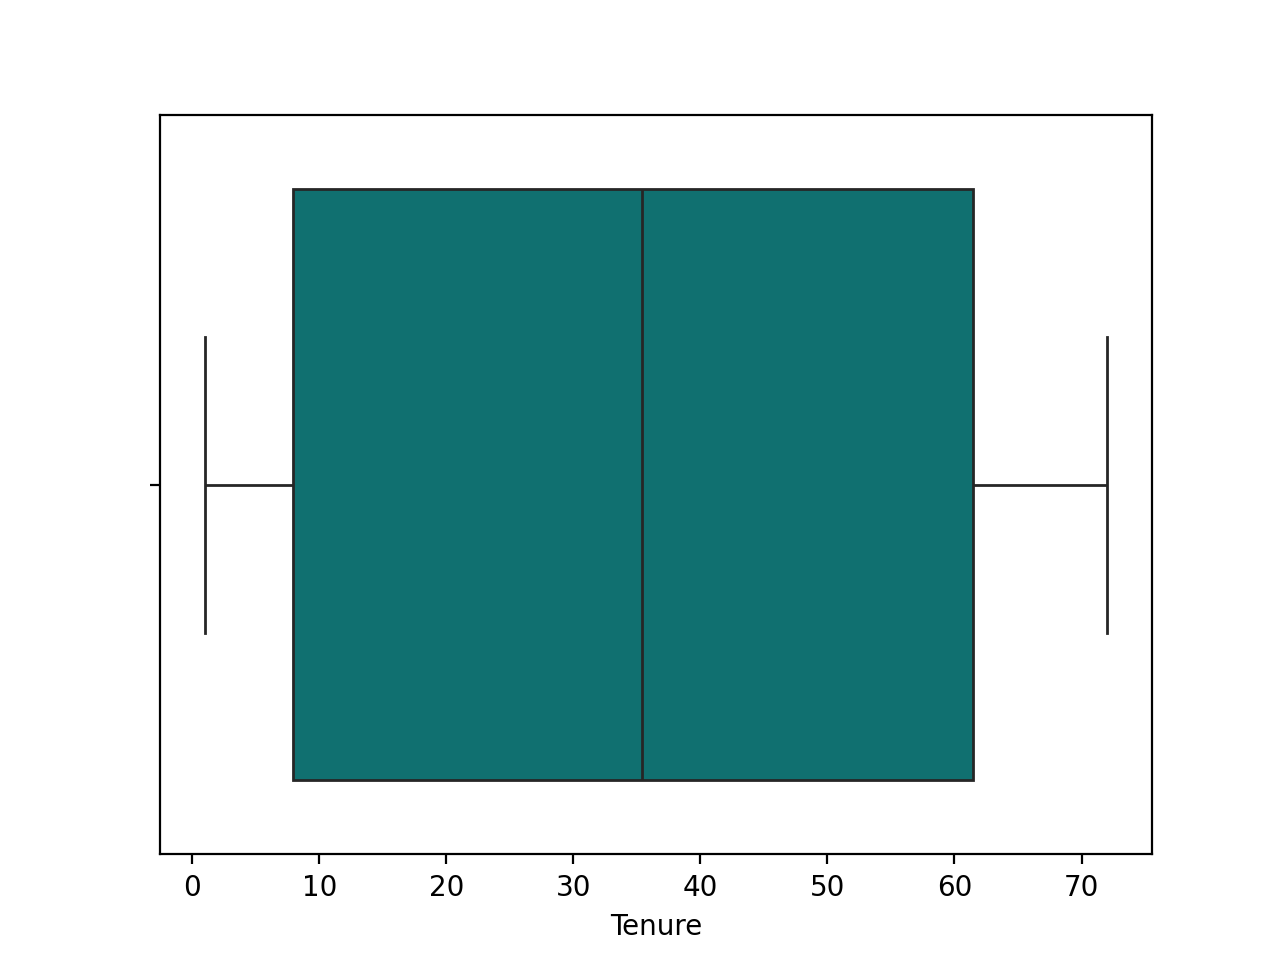

In [ ]:
# Boxplot Tenure
boxplot = sns.boxplot(x='Tenure', data=churndf, color='teal')

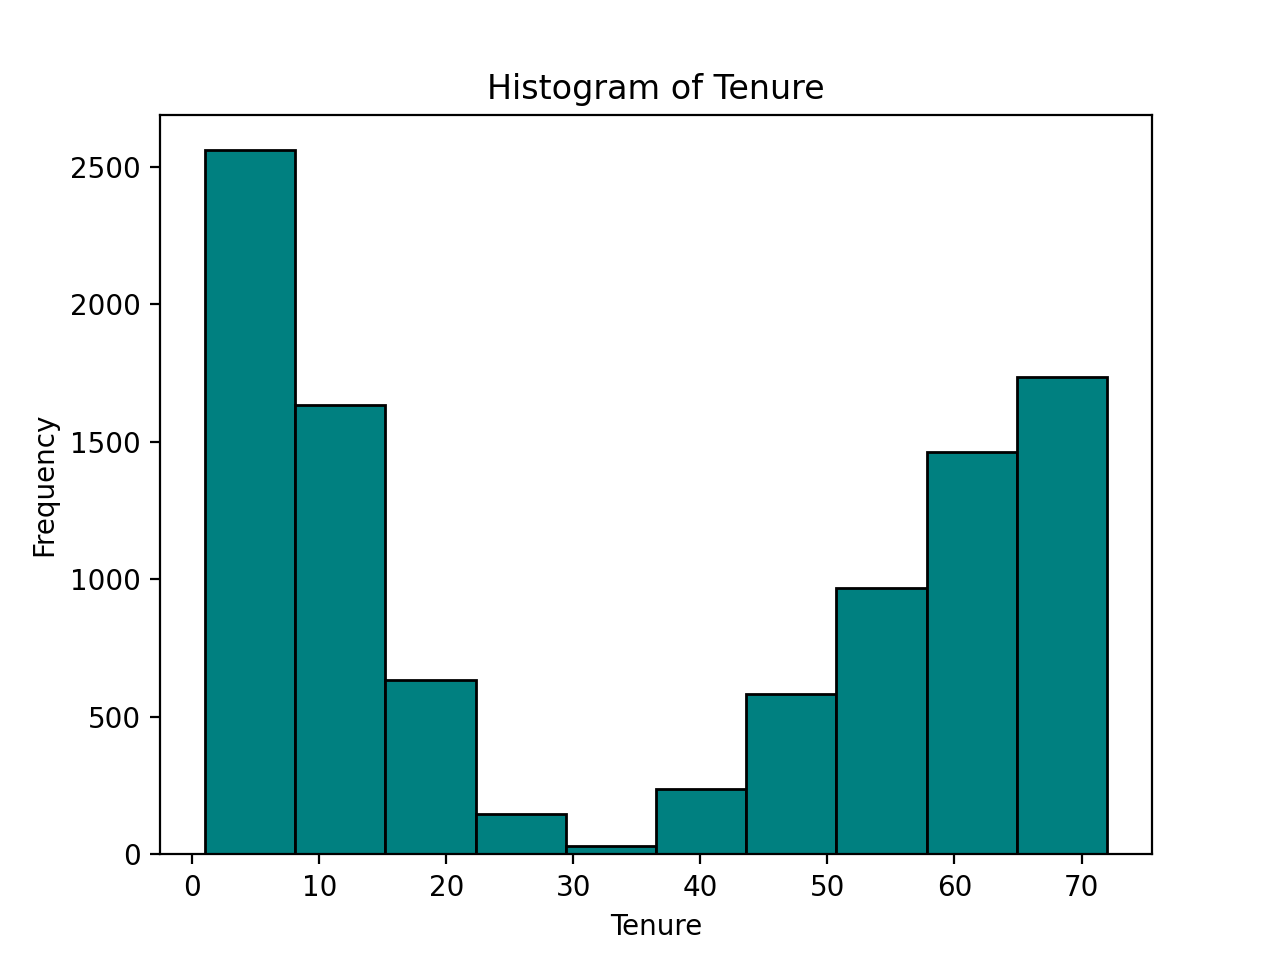

In [ ]:
# Create the histogram for Tenure
plt.hist(churndf['Tenure'], edgecolor='black', color='teal')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Histogram of Tenure')

# Show the plot
plt.show()


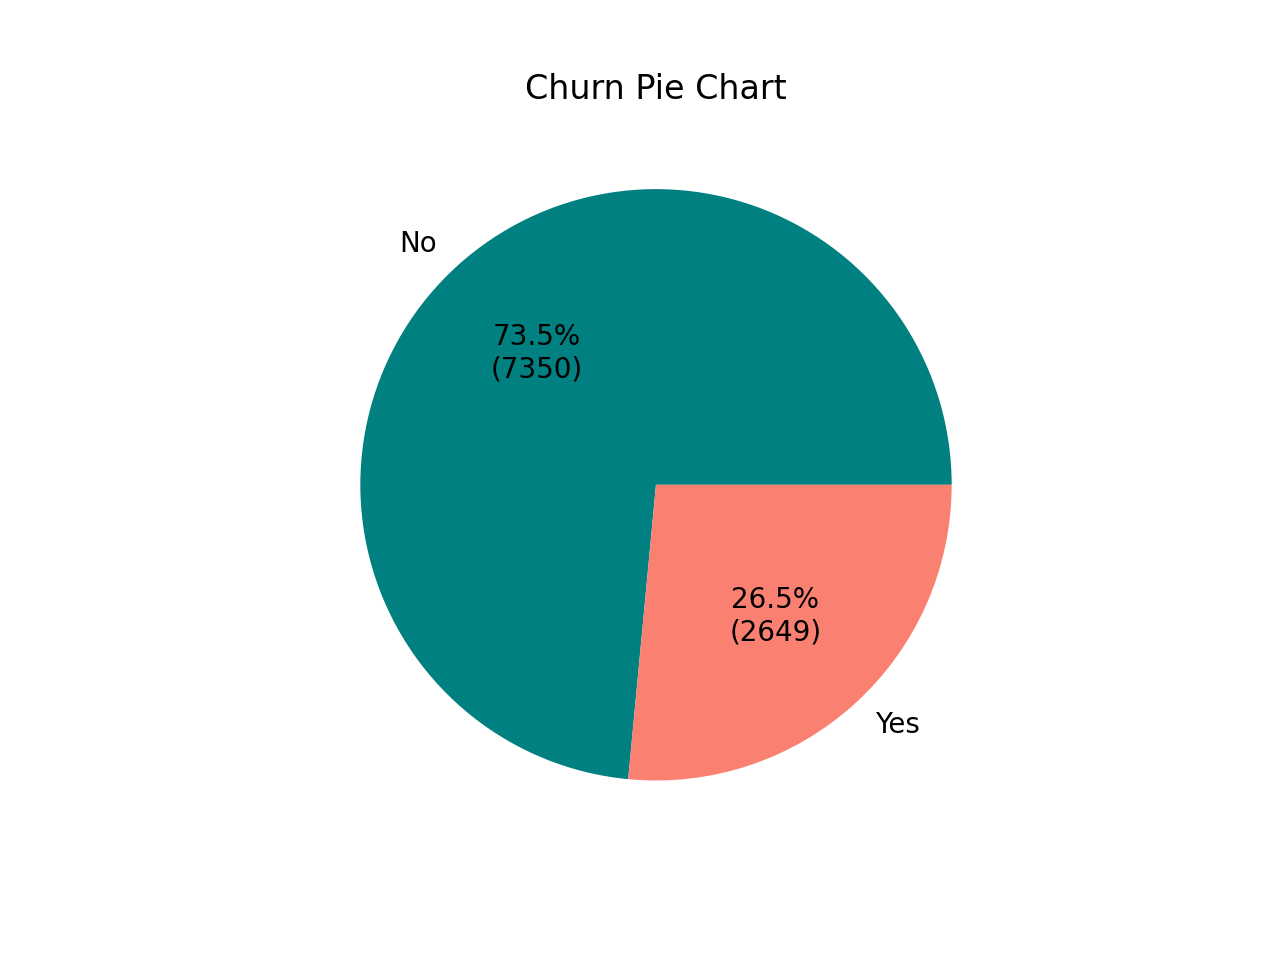

In [ ]:
# Churn Pie Chart

plt.pie(churn_count, colors=['teal', 'salmon'], labels=churn_count.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(churn_count))})")
plt.title('Churn Pie Chart')
plt.show()

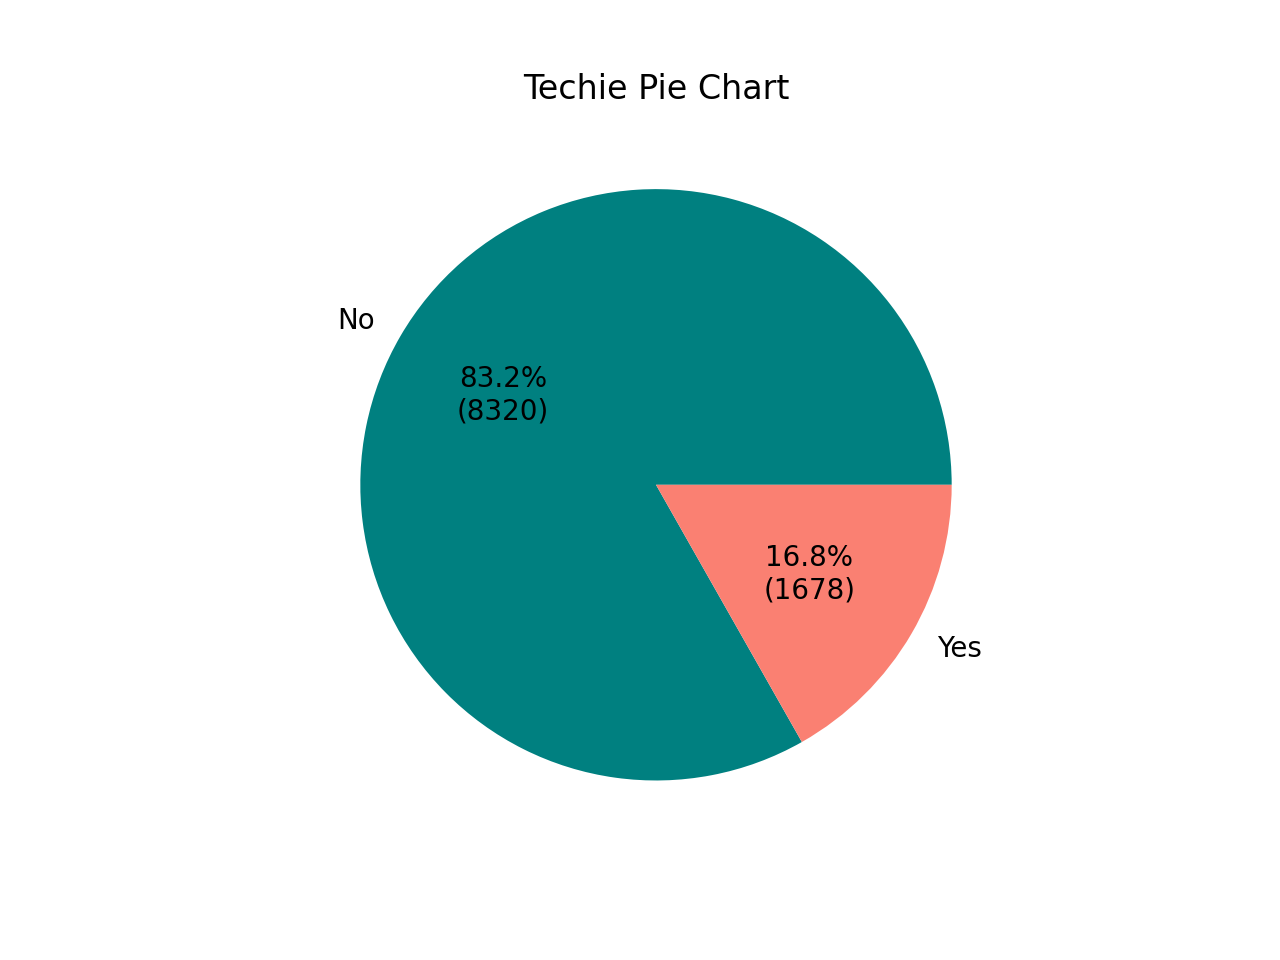

In [ ]:
# Pie Chart Techie

techie_count = churndf['Techie'].value_counts()

plt.pie(techie_count, colors=['teal', 'salmon'], labels=churn_count.index, autopct=lambda pct: f"{pct:.1f}%\n({int(pct/100*sum(churn_count))})")
plt.title('Techie Pie Chart')
plt.show()

# D1: Bivariate Statiscal Distribution

The bivariate statistical distribution was shown for the variables as a histogram, density plots, pair plots, and a stacked column.

Continuous Variables:
* Monthly Charge
* Tenure

Categorical Variables:
* Churn
* Techie

Findings:

* Histogram Monthly Charge / Churn: unimodal, bell-shaped, slightly right-skewed histogram
* Density Plot Monthly Charge / Churn: both symmetric, churn no is unimodal, churn yes is bimodal, churn no data skews left
* Density Plot Tenure / Churn: churn yes is unimodal with strong left skew, churn no is bimodal with a non-symmetric shape
* Density Plot Monthly Charge / Techie: both churn yes/no are unimodal, symmetric, and have nearly identical plots
* Density Plot Tenure / Techie: both churn yes/no are bimodal, non-symmetric, and skew left, and once again have nearly ideal plots
* Pair Plot Monthly Charge / Tenure / Churn: shows visually a lot of topics discussed earlier - churn yes having higher monthly charges and shorter tenure compared to those that did not churn
* Pair Plot Monthly Charge / Tenure / Techie: shows visually that non-techies have higher monthly charges and higher tenures
* Stacked Column Techie / Churn: shows the rate of churn with techie status in stacked columns, with pretty similar rates of techie status in both groups
* Violin Plot Tenure / Churn: shows visually churn rates are high in groups with shorter tenures, groups that have longer tenures are less likely to churn
* Violin Plot Monthly Charge / Churn: shows customers with higher monthly charges are more likely to churn

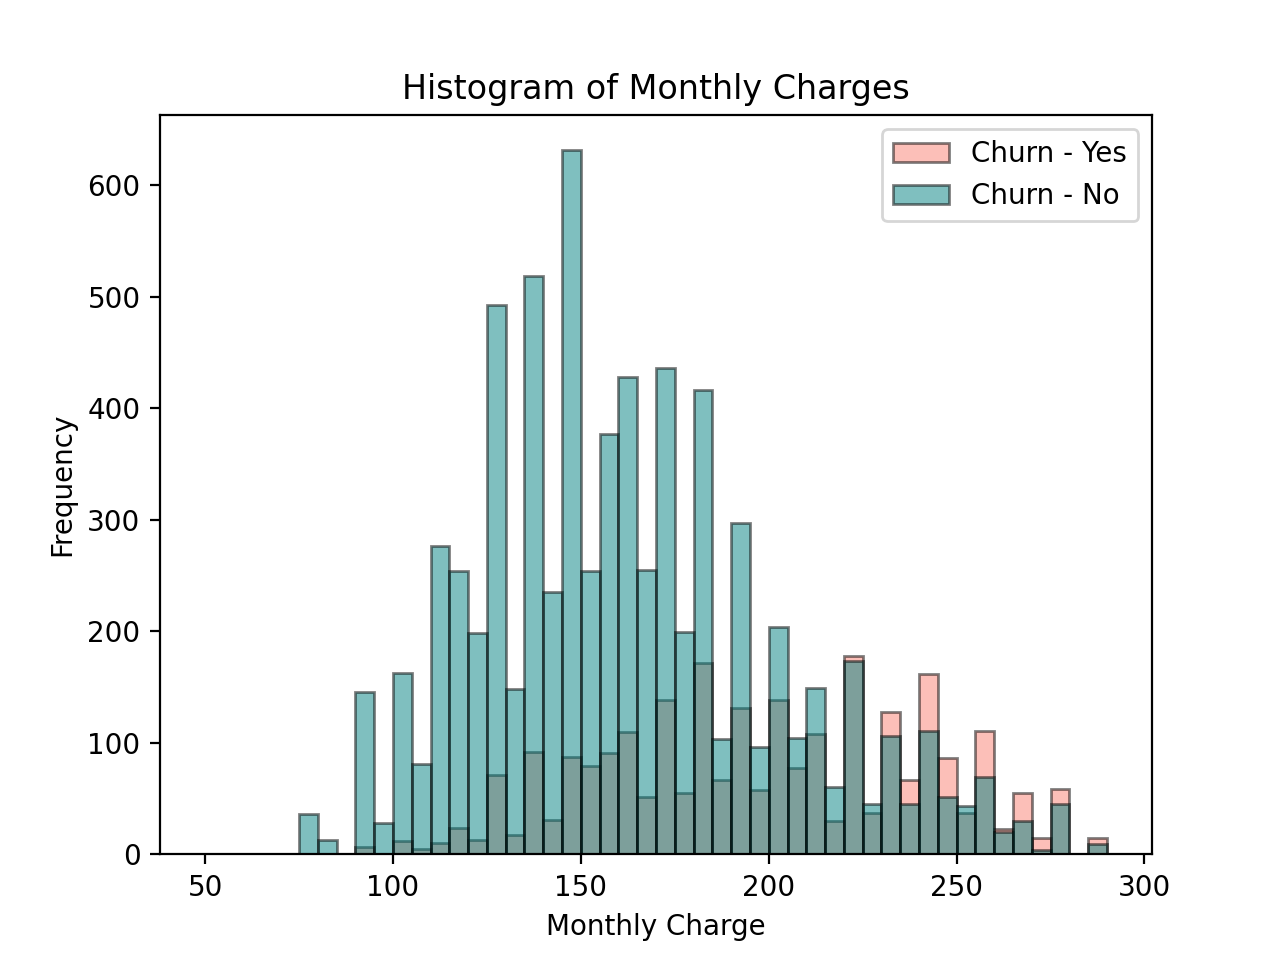

In [ ]:
# Histogram Monthly Charge / Churn

# Filter the data frame for churn
churn_customers_df = mc_churn_df[mc_churn_df['Churn'] == 'Yes']
retained_customers_df = mc_churn_df[mc_churn_df['Churn'] == 'No']

# Define the bin edges for the histogram with $5 buckets
bin_edges = range(50, int(mc_churn_df['MonthlyCharge'].max()) + 5, 5)

# Create the histogram for churned customers
plt.hist(churn_customers_df['MonthlyCharge'], bins=bin_edges, edgecolor='black', color='salmon', alpha=0.5, label='Churn - Yes')

# Create the histogram for non-churned customers
plt.hist(retained_customers_df['MonthlyCharge'], bins=bin_edges, edgecolor='black', color='teal', alpha=0.5, label='Churn - No')

# Add labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Frequency')
plt.title('Histogram of Monthly Charges')

# Add legend
plt.legend()

# Show the plot
plt.show()


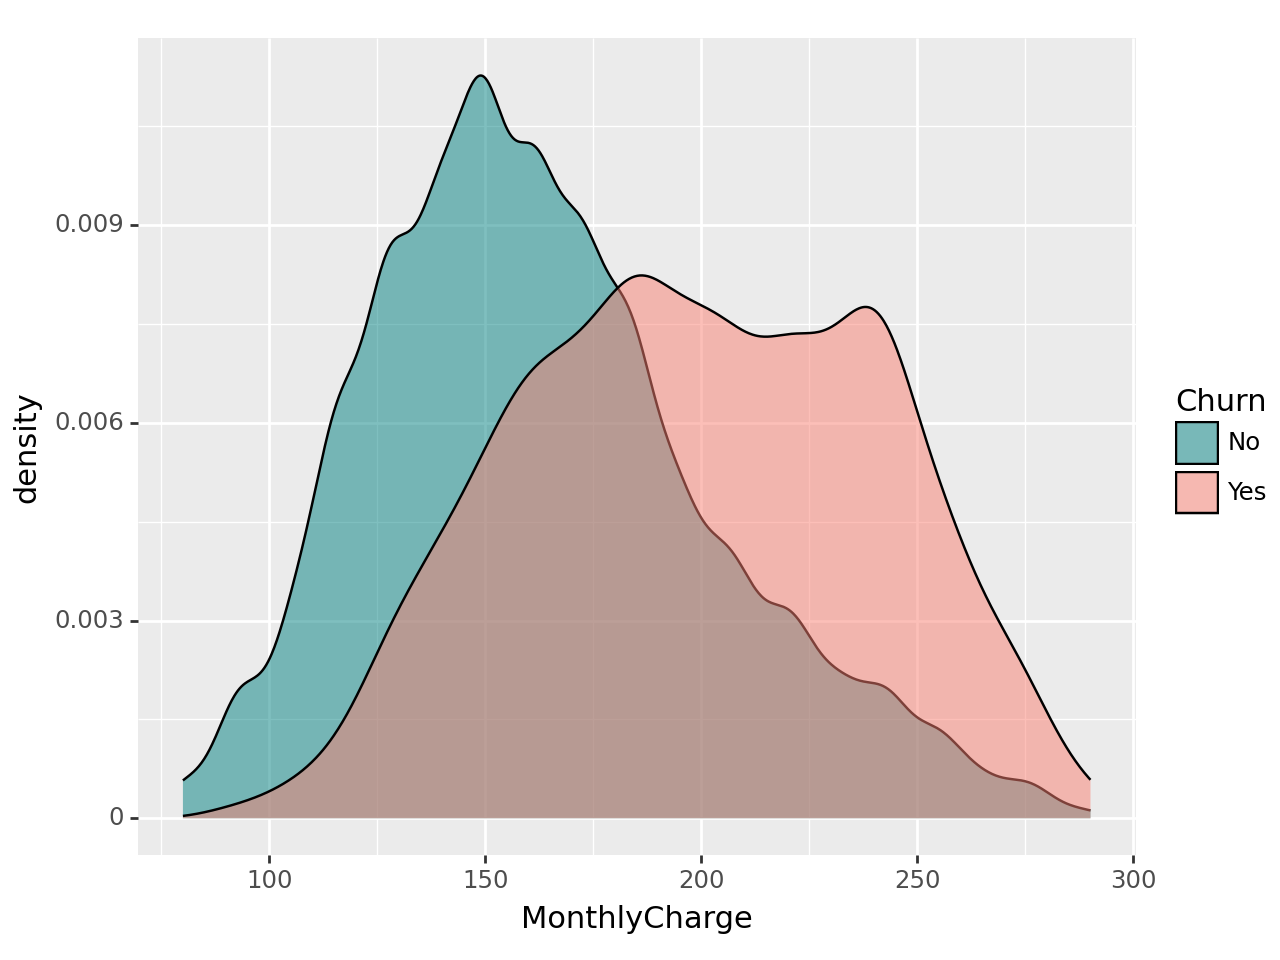

In [ ]:
#Density plot with Monthly Charge / Churn
print(p9.ggplot(mc_churn_df) + p9.aes(x='MonthlyCharge', fill='Churn') +p9.geom_density(alpha=0.5) + p9.scale_fill_manual(values=["teal", "salmon"]))

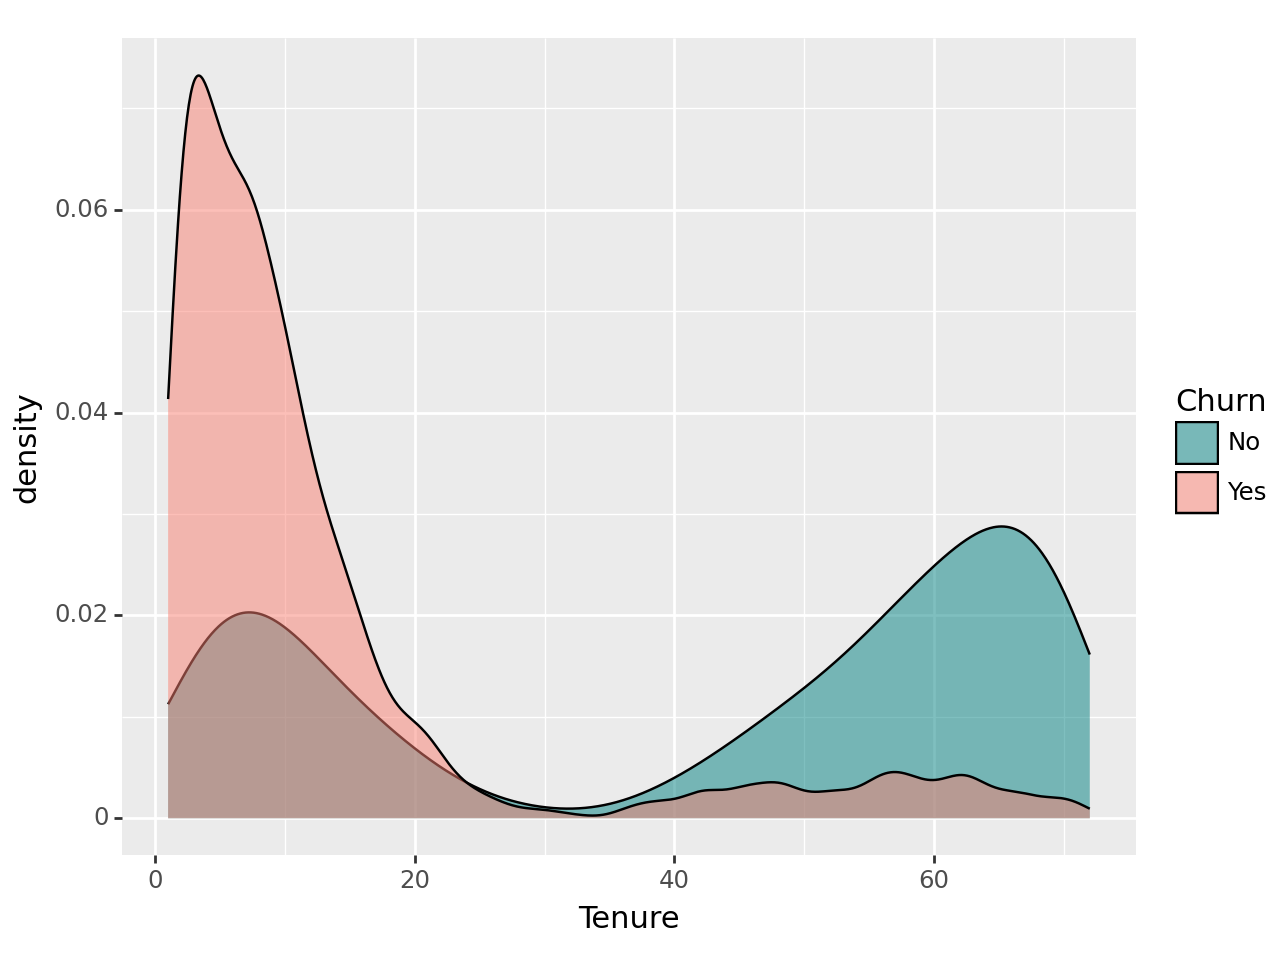

In [ ]:
#Density plot with Tenure / Churn
print(p9.ggplot(churndf) + p9.aes(x='Tenure', fill='Churn') +p9.geom_density(alpha=0.5) + p9.scale_fill_manual(values=["teal", "salmon"]))

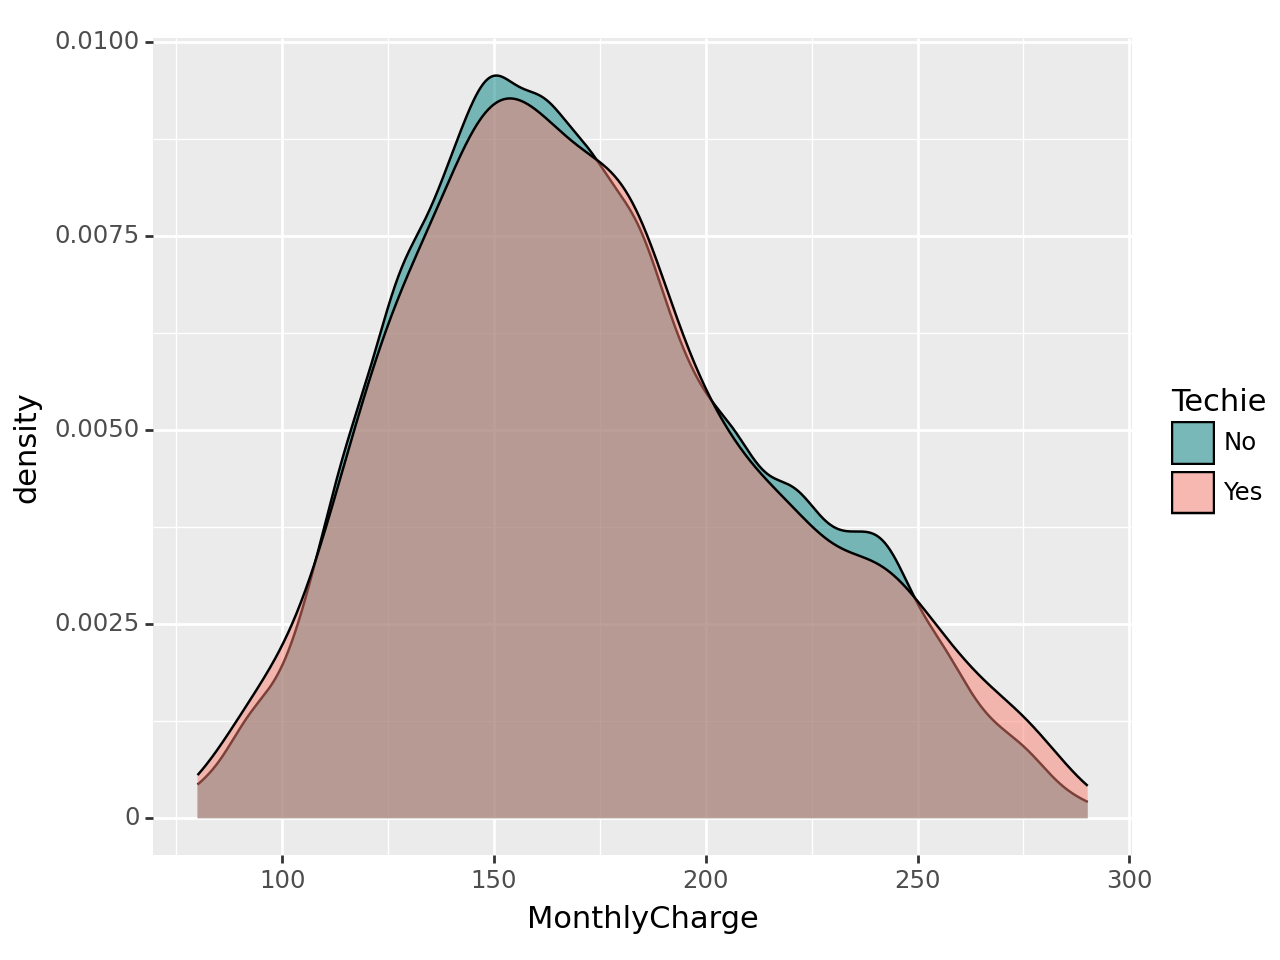

In [ ]:
#Density plot with Monthly Charge / Techie
print(p9.ggplot(churndf) + p9.aes(x='MonthlyCharge', fill='Techie') +p9.geom_density(alpha=0.5) + p9.scale_fill_manual(values=["teal", "salmon"]))

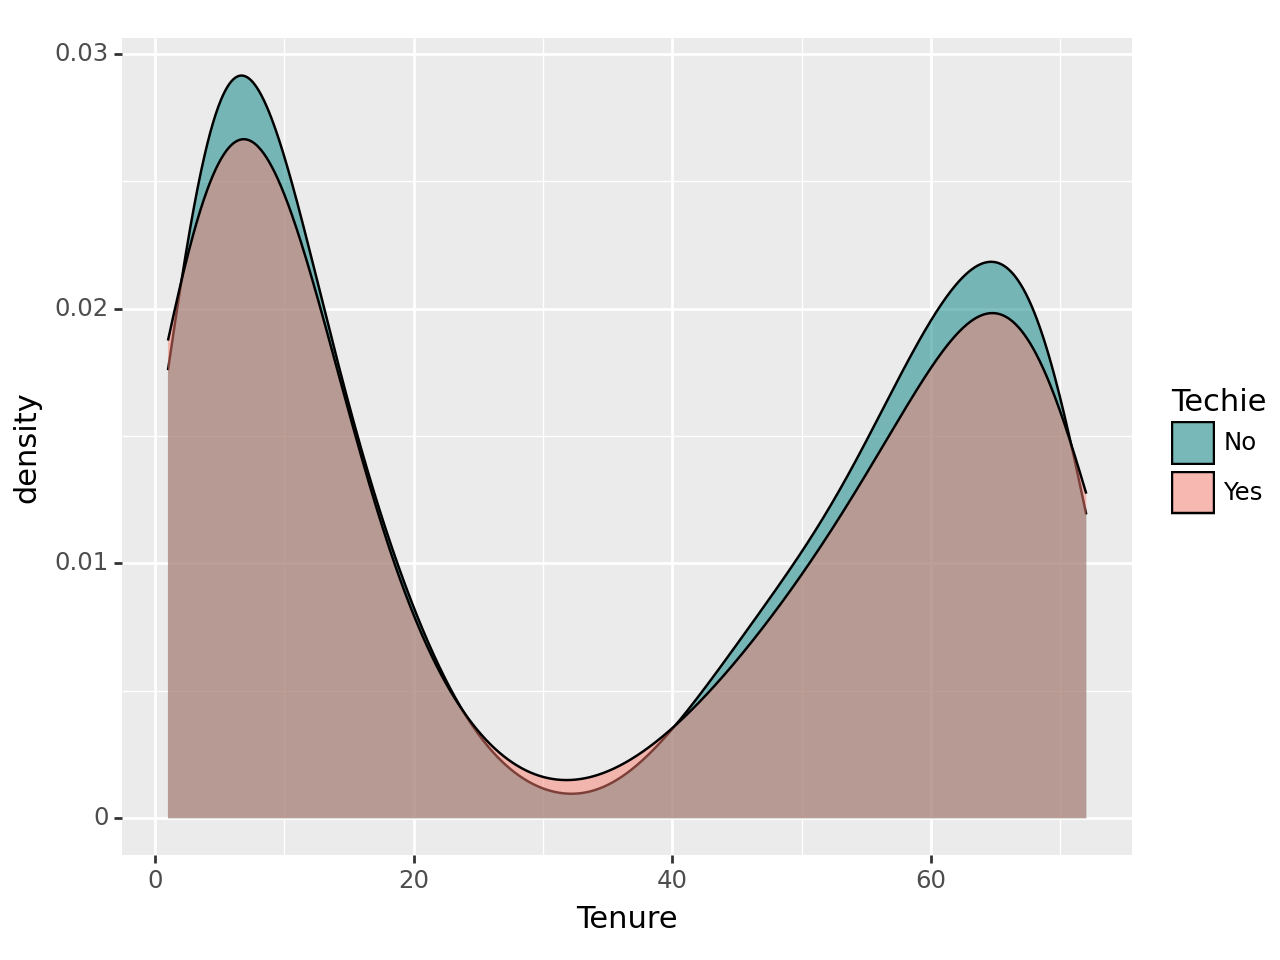

In [ ]:
#Density plot with Tenure / Techie
print(p9.ggplot(churndf) + p9.aes(x='Tenure', fill='Techie') +p9.geom_density(alpha=0.5) + p9.scale_fill_manual(values=["teal", "salmon"]))

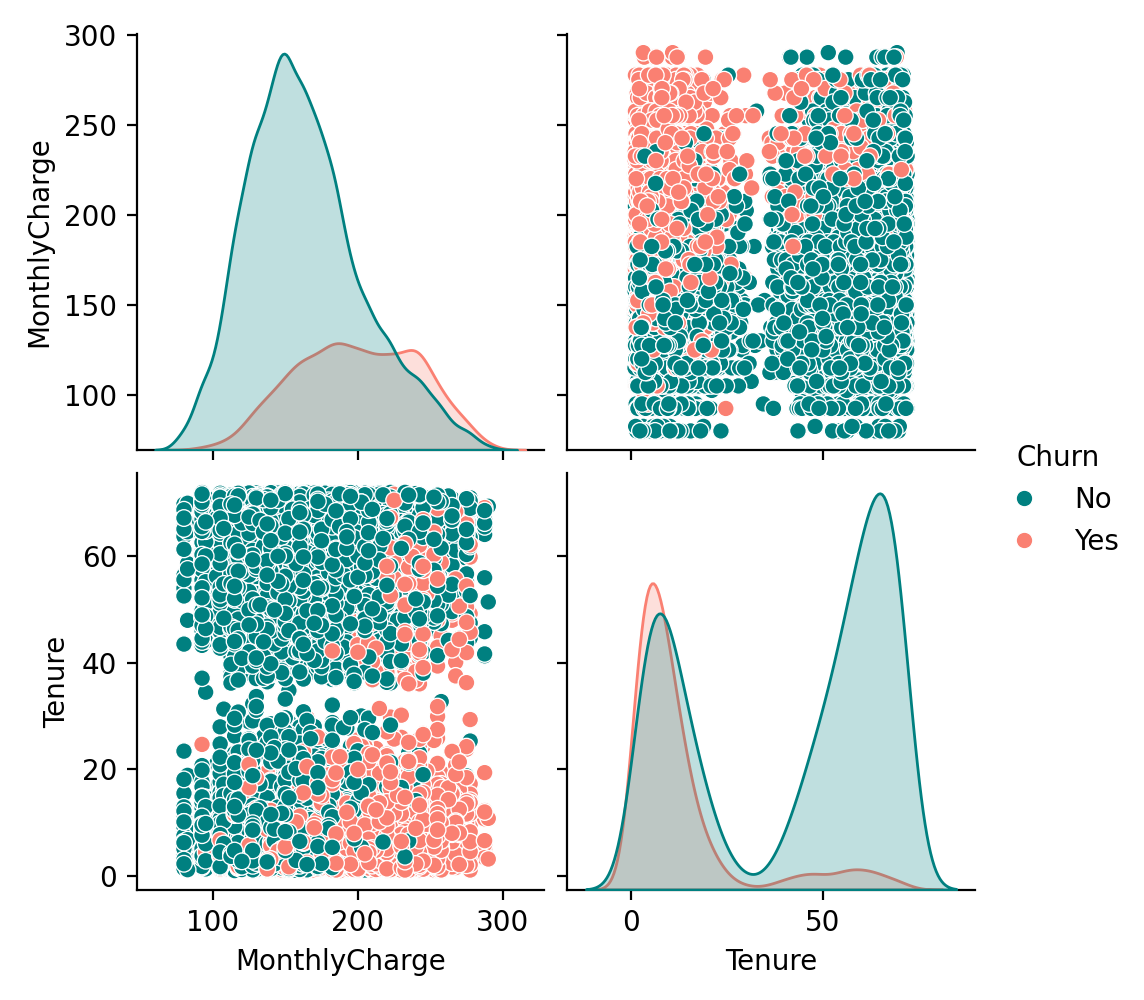

In [ ]:
# Create bivariate data frame for pair plot
bivariatedf = churndf[['MonthlyCharge', 'Tenure', 'Churn', 'Techie']].copy()

# Create pair plot for Monthly Charge / Tenure / Churn
sns.pairplot(bivariatedf, hue='Churn', palette={'Yes': 'salmon', 'No': 'teal'})
plt.show()

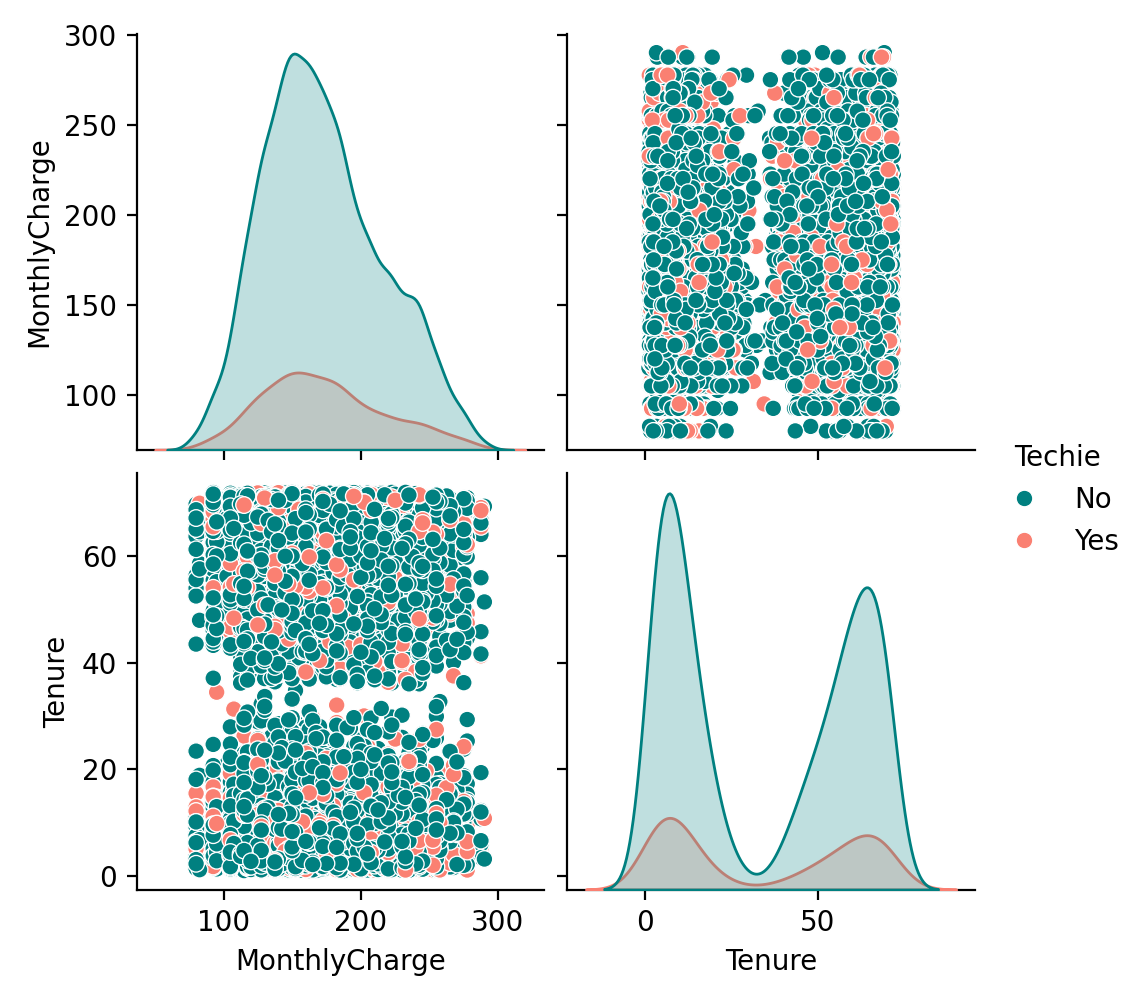

In [ ]:
# Create pair plot for Monthly Charge / Tenure / Techie
sns.pairplot(bivariatedf, hue='Techie', palette={'Yes': 'salmon', 'No': 'teal'})
plt.show()

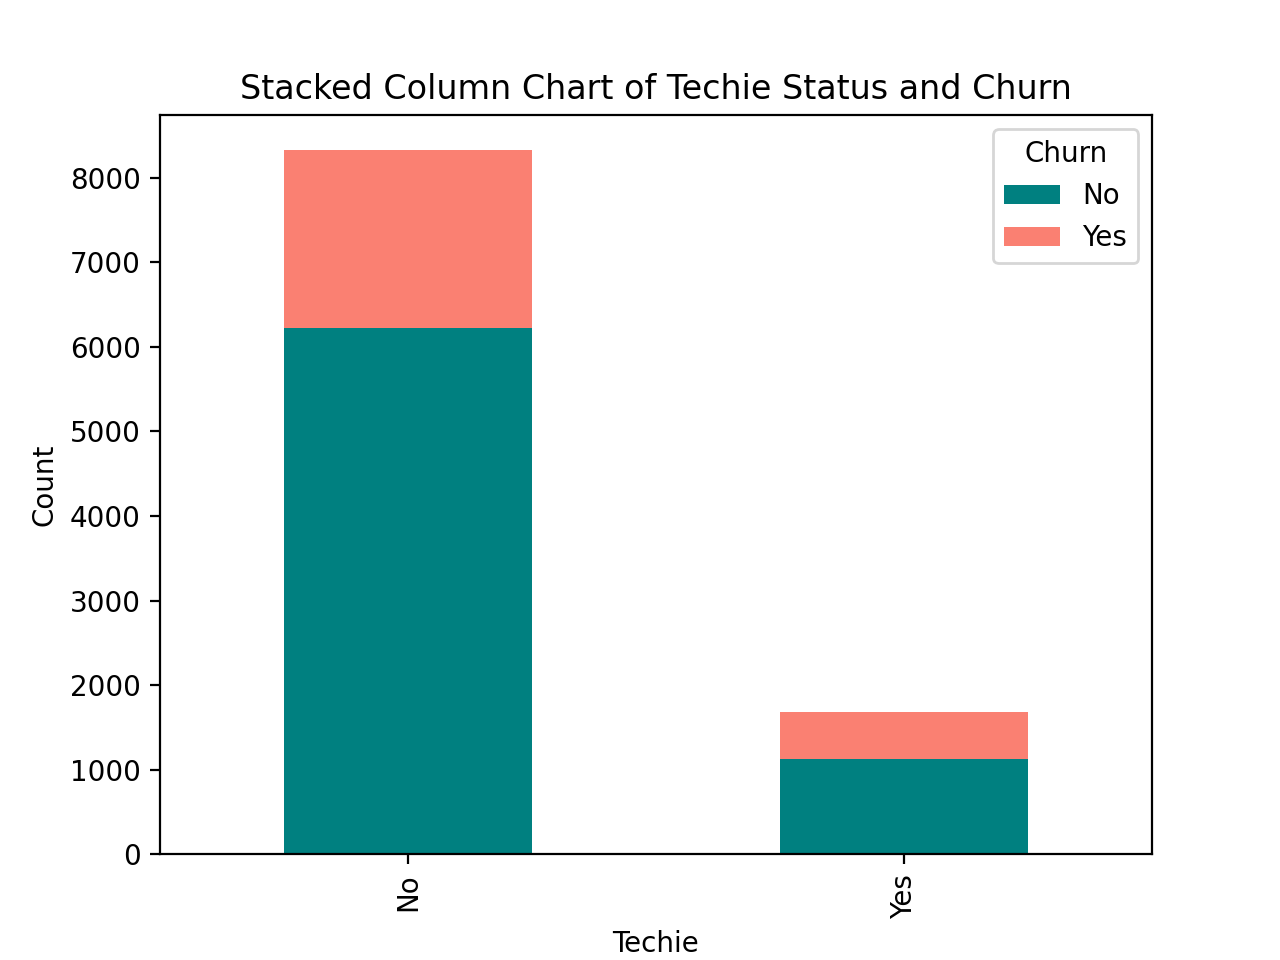

In [ ]:
# Group by and count occurrences of Techie and Churn
stackeddf = bivariatedf.groupby(['Techie', 'Churn']).size().unstack()

# Plot stacked column chart
stackeddf.plot(kind='bar', stacked=True, color=['teal', 'salmon'])

# Add labels and title
plt.xlabel('Techie')
plt.ylabel('Count')
plt.title('Stacked Column Chart of Techie Status and Churn')

# Show the plot
plt.show()


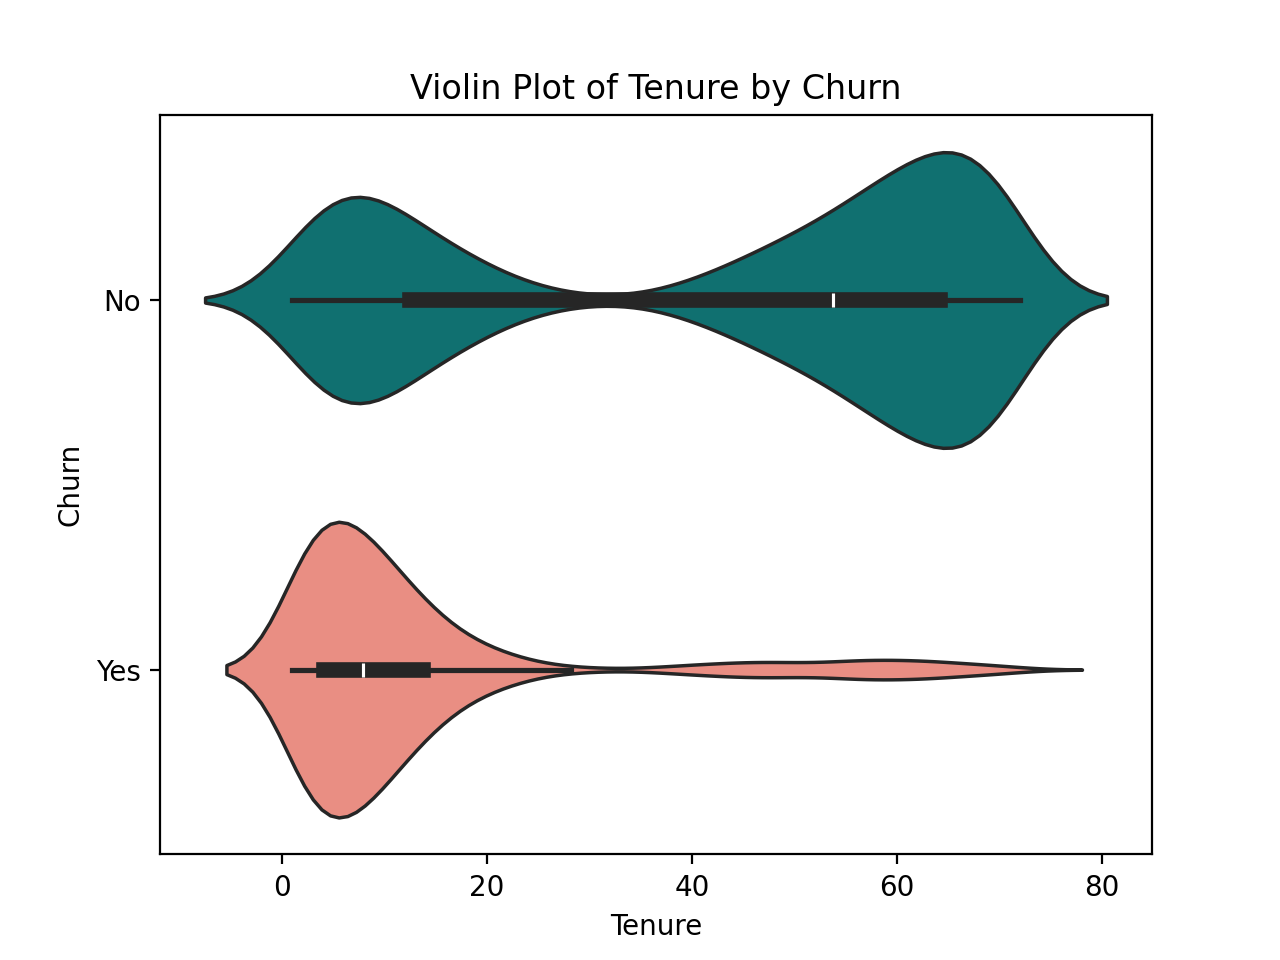

In [ ]:
# Create the violin plot
sns.violinplot(data=bivariatedf, x='Tenure', y='Churn', hue='Churn', palette={'Yes': 'salmon', 'No': 'teal'}, legend=False)

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Churn')
plt.title('Violin Plot of Tenure by Churn')

# Show the plot
plt.show()


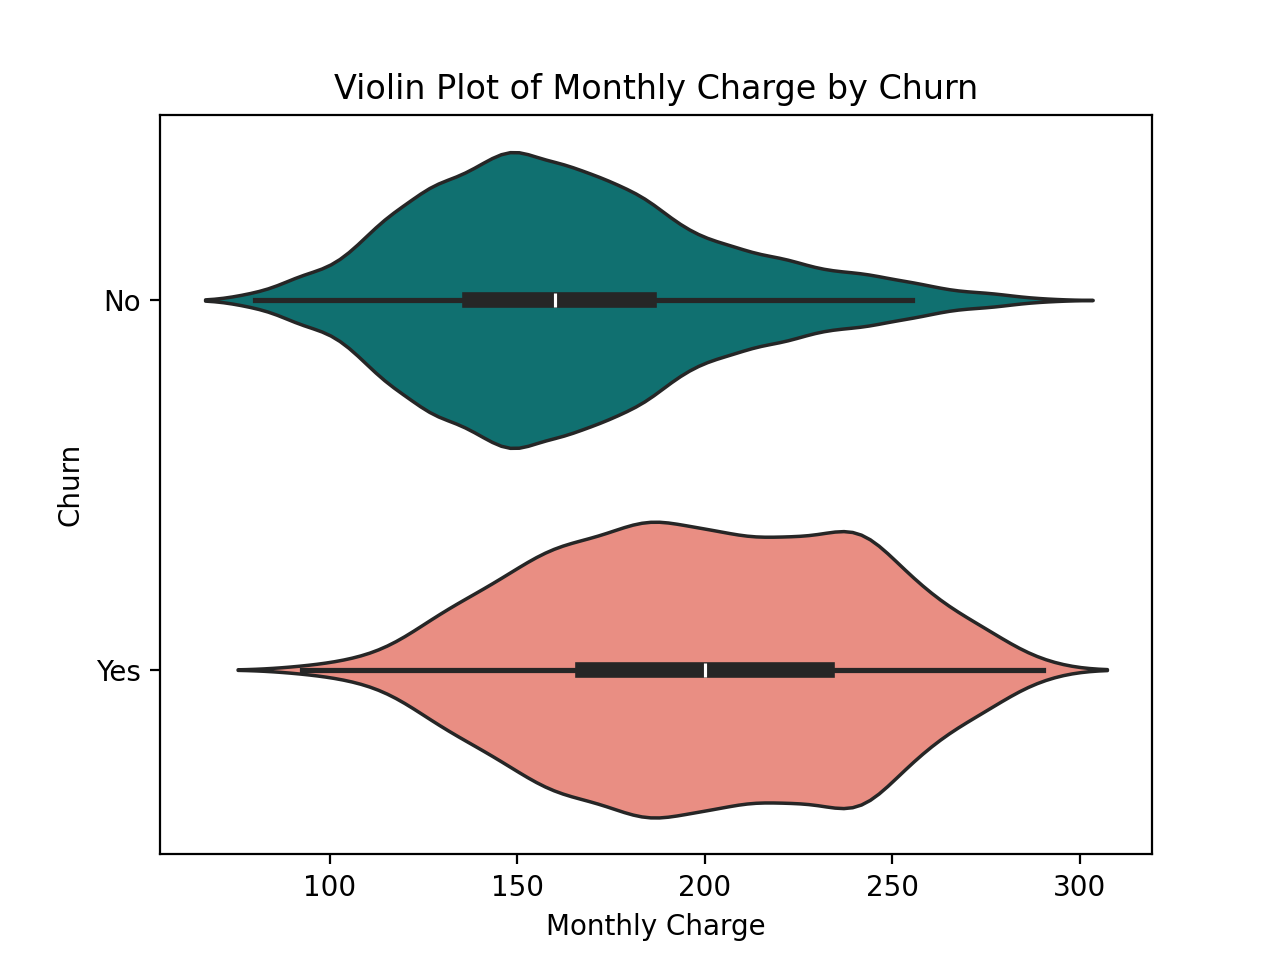

In [ ]:
# Create the violin plot
sns.violinplot(data=bivariatedf, x='MonthlyCharge', y='Churn', hue='Churn', palette={'Yes': 'salmon', 'No': 'teal'}, legend=False)

# Add labels and title
plt.xlabel('Monthly Charge')
plt.ylabel('Churn')
plt.title('Violin Plot of Monthly Charge by Churn')

# Show the plot
plt.show()


# E. Summary

# E1: Results of Hypothesis Test

After conducting a t-test to explore the relationship between monthly charges and churn we see a statistically significant correlation. The t-statistic was 40.2 and the p-value was 0.0. The visualizations reinforce this finding showing that higher monthly charges lead to a higher likelihood that a customer will churn from the telecommunications company.

# E2: Limitations of Analysis

While the hypothesis testing shows a strong correlation between monthly charge and churn there are several limitations to this, especially considering the t-test is only considering two variables (Monthly Charge and Churn). Since the t-test only considers two variables there is potential other important factors and contributions to churn are being overlooked. Churn is likely a complex customer decision with many contributing factors beyond just the Monthly Charge. To get more specific reasons for customers’ churn more data is likely needed. Some ideas for other data to compare and analyze would be:

* Statement charges: specific categories of charges on customers’ statements
* Location: information on customers retained/lost area and competitors’ rates and offerings in those areas
* Usage: what are products most utilized by the customers? Where is the most room for improvement?

With the inclusion of this additional data and further analysis, a more comprehensive understanding of the factors driving customer churn could be constructed.  

# E3: Recommendations

The main recommendation would be to further investigate causes for higher monthly charges to see if anything can be improved upon to retain customers. Further analysis could be done with the data set and churn rates with usage per year, location, and what services customers are using. Another recommendation would be to collect more data such as more comprehensive statement charges, competitor rates, and offerings, and service quality being offered across the areas the telecommunications serves to see if there is an infrastructure issue.

# F: Panopto Recording

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b6afaab7-0e2f-4a78-9712-b1450167fdfb

# G: Third Party Code Sources

* DataCamp. (2024, April 1). Experimental design in Python [Online course]. Retrieved from https://app.datacamp.com/learn/courses/experimental-design-in-python



# H: Sources


* DataCamp. (2024, April 1). An introduction to Python T-tests [Tutorial]. Retrieved from https://www.datacamp.com/tutorial/an-introduction-to-python-t-tests
* Math Center Oxford Emory. (2024, April 4). Shape, center, and spread. Retrieved from https://mathcenter.oxford.emory.edu/site/math117/shapeCenterAndSpread/
* Matplotlib. (2024, April 1). Matplotlib: Visualization with Python. Retrieved from https://matplotlib.org/
* Plotnine. (2024, April 1). Plotnine: Grammar of graphics for Python. Retrieved from https://plotnine.org/
* Seaborn. (2024, April 1). Seaborn: statistical data visualization. Retrieved from https://seaborn.pydata.org/

# I: Professional Communication